# General Python Tutorial

The tutorial is designed to touch upon 
> 1. Finding data from ArcGIS Hub

> 2. Loading and Visualizing it using ArcGIS API for Python (API)

> 3. Extract it as a Python dataframe for basic exploratory analysis

> 4. Query the data for specific results using the API

> 5. Customize map results using API

We start by importing necessary Python packages

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline

## Step 1: Finding data from ArcGIS hub

Look for the dataset in the search bar shown below on the ArcGIS hub home page.

The dataset used through this tutorial is the [Bicycle Lanes](http://www.arcgis.com/home/item.html?id=294e062cdf2c48d5b9cbc374d9709bc0#overview) dataset for DC.

![search](home.png)

When you click on the dataset in the search results, it takes you to the details of the dastaset. Find the __'Service URL'__ link as shown below and click on it.

Copy the URL of the page it leads to.

![service](serviceURL.png)

# Step 2.1: Loading the data using ArcGIS API for Python

The copied URL is stored in the variable __lyr_url__ and using the __arcgis__ package of Python it is loaded as a feature/map layer in Python

In [2]:
from arcgis.features import FeatureLayer
lyr_url = 'https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Transportation_WebMercator/MapServer/2'

bike_layer = FeatureLayer(lyr_url)
bike_layer

<FeatureLayer url:"https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Transportation_WebMercator/MapServer/2">

Using the following lines of code, we output the fields/attributes of the dataset

In [3]:
for f in bike_layer.properties.fields:
    print(f['name'])

OBJECTID
FACILITYID
STREETSEGID
SOURCEID
BIKELANELENGTH
FACILITY
PROPOSEDCYCLETRACK
Shape
Shape_Length
TRAVELDIRECTION
NOTES
BIKELANE_YEAR
PLANSREADY
GAP
GAP_NOTES
NEED_SYMBOL
NEED_SYM_1
REPAINT_LINE
YEAR_INSTALLED


We now retreive the entire dataset in __all_features__ get a count of all the rows in the dataset

In [4]:
all_features = bike_layer.query()
len(all_features.features)

1370

# Step 2.2: Visualizing it using the API

In [5]:
from arcgis.gis import GIS
gis = GIS()

map1 = gis.map('Washington, DC', 13)

In the following step we add the Bikelanes as a layer superimposing the basemap of Washington, DC initialized above.

The "url" attribute is provided with the __Service URL__

In [6]:
map1.add_layer({"type":"FeatureLayer",
                "url":"https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Transportation_WebMercator/MapServer/2",
               })
map1

Widget Javascript not detected.  It may not be installed or enabled properly.


# Step 3.1: Loading the data as a Pandas DataFrame

The variable __all_features__ is of datatype arcgis FeatureSet.

In order to use this data as a tabular dataset, we need to store it as a Pandas DataFrame, as shown below.

In [7]:
#store as dataframe
data = all_features.df

#View first 5 rows
data.head()

,BIKELANELENGTH,BIKELANE_YEAR,FACILITY,FACILITYID,GAP,GAP_NOTES,NEED_SYMBOL,NEED_SYM_1,NOTES,OBJECTID,PLANSREADY,PROPOSEDCYCLETRACK,REPAINT_LINE,SOURCEID,STREETSEGID,Shape_Length,TRAVELDIRECTION,YEAR_INSTALLED,SHAPE
0,0.009455,0,Existing Bike Lane,SEGID- 9854,,,None,None,,1,,,None,15135550,9854,15.216846,,2008,"{'paths': [[[-8573273.977615476, 4715455.45970..."
1,0.076754,0,Existing Bike Lane,SEGID- 10198,,,None,None,"COG 95, 1975 plan, public input",2,,,None,15135555,10198,123.524976,,2008,"{'paths': [[[-8573264.662602307, 4715472.71048..."
2,0.058610,0,Existing Bike Lane,SEGID- 9167,,,None,None,"COG 95, 1975 plan, public input",3,,,None,15135560,9167,94.322895,,2008,"{'paths': [[[-8573183.827335583, 4715609.70743..."
3,0.026891,0,Existing Bike Lane,SEGID- 12337,,,None,None,"COG 95, 1975 plan, public input",4,,,None,15135565,12337,43.276471,,2008,"{'paths': [[[-8573122.896706875, 4715714.84043..."
4,0.172385,0,Existing Bike Lane,SEGID- 10611,,,None,None,"COG 95, 1975 plan, public input",5,,,None,15135580,10611,277.425702,,2008,"{'paths': [[[-8572973.134739578, 4715973.04009..."


Since this is a spatial dataset (contains geometry that can be plotted on a map), we will convert it to a geodataframe to view its details.

data_gdf = gpd.GeoDataFrame(data)
data_gdf.info()

#### The result above shows that this dataset has 1370 rows and 19 columns, of which 3 columns (NEED_SYMBOL, NEED_SYM_1, REPAINT_LINE) have no data.

# Step 3.2: Basic exploratory analysis

Let's start by computing the total distance of bike lanes in DC..

In [8]:
np.sum(data['BIKELANELENGTH'])

96.47902169999992

### We just found out the total coverage of bike lanes in DC, which is approximately 96.48 UNITS

We will now find the types of bike lanes stored in the column __'FACILITY'__ and visualize the number of bike lanes based on type.

In [9]:
#Gives unique values in a dataframe column
data['FACILITY'].unique()

array(['Existing Bike Lane', 'Shared Lane', 'Climbing Lane', 'Cycle Track',
       'Contraflow Bike Lane', 'Bus/Bike Lane', ' '], dtype=object)

Let's now find the number of bike lanes of each unique type and store it in __counts__

In [10]:
counts = data['FACILITY'].value_counts()

In [11]:
print(counts)

Existing Bike Lane      908
Shared Lane             258
Cycle Track              88
Climbing Lane            62
Contraflow Bike Lane     45
                          5
Bus/Bike Lane             4
Name: FACILITY, dtype: int64


We will now visualize __counts__ as a bar chart

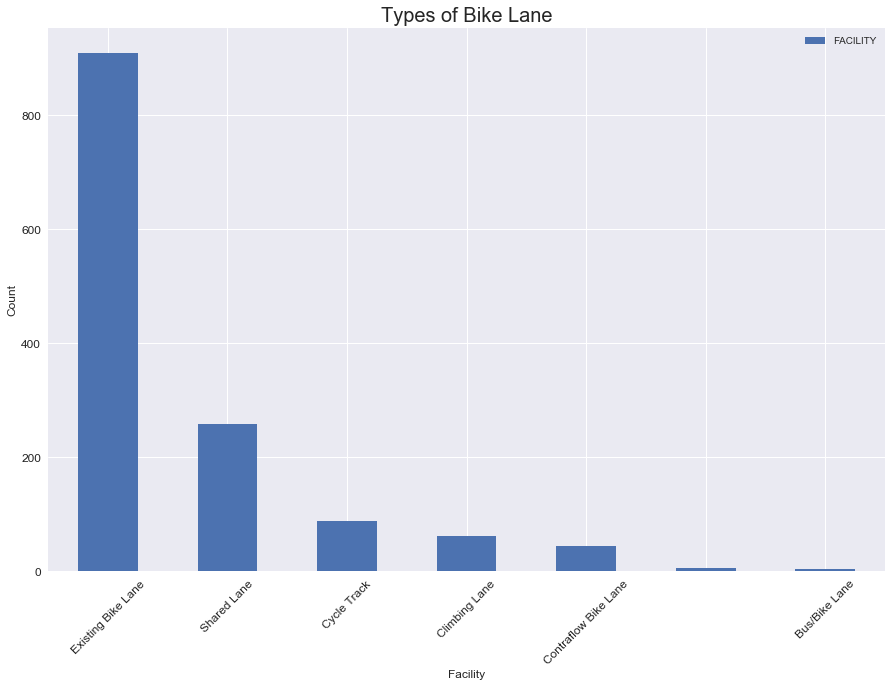

In [12]:
#Generates bar graph
ax = counts.plot(kind='bar', figsize=(15, 10), legend=True, fontsize=12)

#X axis text and display of categories
ax.set_xlabel("Facility", fontsize=12)
plt.xticks(rotation=45)

#Y axis text
ax.set_ylabel("Count", fontsize=12)

#Title
ax.set_title("Types of Bike Lane", fontsize=20)

# Step 4: Query the data for specific results

We now try to query the dataset based on certain filters using the __where__ clause qithin the query. 

__NOTE:__ These filters can only be applied to numerical data fields

In [13]:
query_result = bike_layer.query(where="BIKELANE_YEAR>0")
len(query_result.features)

798

# Step 5: Customize map results

Let's start by finding the various unique values in the column __'YEAR_INSTALLED'__

In [14]:
data['YEAR_INSTALLED'].unique()

array([2008, 2005, 1980, 2007, 2010, 2013, 2014, 2002, 2011, 2009, 2004,
       2012, 2006, 2003, 2015, 2016,    0, 2001], dtype=int64)

In [15]:
map2 = gis.map('Washington, DC', 13)
#setting a basemap to the map
map2.basemap = 'gray'

Here we use the __ClassedColorRenderer__ in order to render different colors on the map, based on the values in the __field_name__. 

__NOTE:__ The column provided as "field_name" can only be of NUMERICAL data type.

In [16]:
map2.add_layer({"type":"FeatureLayer",
                "url":"https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Transportation_WebMercator/MapServer/2",
                "renderer":"ClassedColorRenderer", "field_name":"YEAR_INSTALLED"
               })
map2

Widget Javascript not detected.  It may not be installed or enabled properly.
